# Test Quant Dataset Creation
---

**Imports**

In [1]:
from src.libs.project_libs import *

/home/franec94/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/franec94/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_

### Global Variables
---

In [2]:
ROOT_DIR = "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/test066_airplane/test066_airplane_4"
OUT_DIR = "./out/results"
CONF_FILEPATH = "./confs/conf.yaml"
TESTS_LOGGING_ROOTS = "./logs"
OUTPUT_DATASET_PATH = "./out/datasets"
PERFORMANCES_PATH = "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/test066_airplane/performances.txt"
OUT_FILENAME = "out.csv"

In [3]:
conf_data_dict = dict(
    root_dir=ROOT_DIR,
    out_dir=OUT_DIR,
    conf_filepath=CONF_FILEPATH,
    tests_logging_root=TESTS_LOGGING_ROOTS,
    output_dataset_path=OUTPUT_DATASET_PATH,
    performances_path=PERFORMANCES_PATH
)
# pprint(conf_data_dict)
meta_data_table = dict(
    tabular_data=conf_data_dict.items()
)
table_conf_data = tabulate.tabulate(**meta_data_table)
# print(table_conf_data)

In [4]:
parser = cpqd.get_custom_parser_for_notebook(conf_data_dict=conf_data_dict)
args, _  = parser.parse_known_args()
# pprint(args)
meta_data_table = dict(
    tabular_data=vars(args).items()
)
table_conf_data = tabulate.tabulate(**meta_data_table)
# print(table_conf_data)

### Setup Notebook for storing results
---


In [5]:
conf_data: dict = read_conf_file(conf_file_path=args.conf_filepath)
# print(conf_data)

In [6]:
sscqd.check_command_line_args(args=args)

In [7]:
a_run_ts = 1614333442.0503435 # time.time()
sscqd.create_out_dir(args=args, a_run_ts=a_run_ts, raise_exception=False)


Exception: [Errno 17] File exists: './out/results/res_out_1614333442.0503435' managed.


### Create Dataset for Quantized Trials
---

In [8]:
a_df = cqd.create_out_dataset(args=args, conf_data=conf_data, out_filename=OUT_FILENAME)

In [9]:
    merged_df = merge_performace_w_models_data(args=args, models_df=a_df)

    a_df_path = os.path.join(args.out_dir, f"merged_out.csv")
    merged_df.to_csv(a_df_path)

In [10]:
quant_df = copy.deepcopy(merged_df)

In [11]:
ROOT_DIRS = [
    "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/test066_airplane/test066_airplane_1",
    "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/test066_airplane/test066_airplane_2",
    "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/test066_airplane/test066_airplane_3",
    "/media/franec94/Elements/Francesco/THESYS/FROM_DESKTOP/tmp_iside/tmp_qat/test066_airplane/test066_airplane_4"
]

In [12]:
dfs_list: list = []
for ii, ROOT_DIR in enumerate(ROOT_DIRS):
    try:
        conf_data_dict = dict(
            root_dir=ROOT_DIR,
            out_dir=OUT_DIR,
            conf_filepath=CONF_FILEPATH,
            tests_logging_root=TESTS_LOGGING_ROOTS,
            output_dataset_path=OUTPUT_DATASET_PATH,
            performances_path=PERFORMANCES_PATH
        )
        parser = cpqd.get_custom_parser_for_notebook(conf_data_dict=conf_data_dict)
        args, _  = parser.parse_known_args()
        a_df = cqd.create_out_dataset(args=args, conf_data=conf_data, out_filename=OUT_FILENAME)
        merged_df = merge_performace_w_models_data(args=args, models_df=a_df)
        dfs_list.append(copy.deepcopy(merged_df))
    except Exception as err:
        print("[*] Error occuring for:")
        print(f"\t{ii} - {ROOT_DIR}")
        print(f"\tError: {str(err)}")
        pass
    pass

In [13]:
quant_df = pd.concat(dfs_list, axis = 0, ignore_index=True)

### Fetch Other Datasets
---

**Fetch Pruned Dataset**

In [14]:
# date = "___2021.02.22-174841"
image_name = conf_data["input_data"]["image_name"]
pruned_df = dataset_loaders.load_prunining_dataset(dtype="dataframe", image_name=f"{image_name}")

In [15]:
# date = "___2021.02.22-174841"
date = conf_data["init_from"]["date"]
pos =  pruned_df["date_train"] == date
a_row = pruned_df[pos].head(1)

data = pruned_df[pos].head(1).values[0]
cols = list(pruned_df.columns)

a_tmp_dict = dict(zip(cols, data))
meta_data_table = dict(
    tabular_data=a_tmp_dict.items()
)
table_conf_data = tabulate.tabulate(**meta_data_table)
# print(table_conf_data)

In [16]:
pruned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         25 non-null     int64  
 1   experiment_date    25 non-null     object 
 2   date_train         25 non-null     object 
 3   date_test          25 non-null     object 
 4   init_from          25 non-null     object 
 5   root_dir           25 non-null     object 
 6   model_name         25 non-null     object 
 7   size_byte          25 non-null     float64
 8   footprint          25 non-null     object 
 9   psnr               25 non-null     float64
 10  bpp                25 non-null     float64
 11  CR                 25 non-null     object 
 12  mse                25 non-null     float64
 13  ssim               25 non-null     float64
 14  time               25 non-null     float64
 15  entropy            25 non-null     object 
 16  scheduler_name     25 non-nu

In [17]:
pruned_df.head(5)

,Unnamed: 0,experiment_date,date_train,date_test,init_from,root_dir,model_name,size_byte,footprint,psnr,...,n_hl,w,h,L1,L2,lr,size_byte_th,experiment_date_2,nbits,image_name
0,0,-,___2021.02.16-221937,-,___2021.02.03-210001,/home/franec94/Desktop/tmp_iside/tmp_agp_prune...,_best.pth.tar,56946.4,-,51.327850,...,5,256,256,0.0,0.0,0.0001,56946.4,-,32,test066
1,1,-,___2021.02.16-194407,-,___2021.02.03-210001,/home/franec94/Desktop/tmp_iside/tmp_agp_prune...,_best.pth.tar,56946.4,-,51.483484,...,5,256,256,0.0,0.0,0.0001,56946.4,-,32,test066
2,2,-,___2021.02.16-180053,-,___2021.02.03-210001,/home/franec94/Desktop/tmp_iside/tmp_agp_prune...,_best.pth.tar,56946.4,-,51.501561,...,5,256,256,0.0,0.0,0.0001,56946.4,-,32,test066
3,3,-,___2021.02.19-061329,-,___2021.02.03-210001,/home/franec94/Desktop/tmp_iside/tmp_agp_prune...,_best.pth.tar,54488.8,-,51.274570,...,5,256,256,0.0,0.0,0.0001,54488.8,-,32,test066
4,4,-,___2021.02.19-083435,-,___2021.02.03-210001,/home/franec94/Desktop/tmp_iside/tmp_agp_prune...,_best.pth.tar,54488.8,-,51.269326,...,5,256,256,0.0,0.0,0.0001,54488.8,-,32,test066


In [18]:
pruned_df.describe()

,Unnamed: 0,size_byte,psnr,bpp,mse,ssim,time,prune_rate,num_epochs,n_hf,n_hl,w,h,L1,L2,lr,size_byte_th,nbits
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.0,25.0,25.0,25.0,25.0,2.500000e+01,25.000000,25.0
mean,12.000000,57831.136000,51.490170,7.059465,0.000028,0.993732,0.007386,0.311370,433000.000000,64.0,5.0,256.0,256.0,0.0,0.0,1.000000e-04,57831.136000,32.0
std,7.359801,2827.130295,0.412068,0.345109,0.000003,0.000360,0.000104,0.033664,76280.731512,0.0,0.0,0.0,0.0,0.0,0.0,1.383199e-20,2827.130295,0.0
min,0.000000,54488.800000,50.221379,6.651465,0.000023,0.993180,0.007228,0.253622,300000.000000,64.0,5.0,256.0,256.0,0.0,0.0,1.000000e-04,54488.800000,32.0
25%,6.000000,56946.400000,51.274570,6.951465,0.000027,0.993578,0.007308,0.312151,475000.000000,64.0,5.0,256.0,256.0,0.0,0.0,1.000000e-04,56946.400000,32.0
50%,12.000000,56946.400000,51.504987,6.951465,0.000028,0.993684,0.007345,0.321905,475000.000000,64.0,5.0,256.0,256.0,0.0,0.0,1.000000e-04,56946.400000,32.0
75%,18.000000,57765.600000,51.710451,7.051465,0.000030,0.993804,0.007484,0.321905,475000.000000,64.0,5.0,256.0,256.0,0.0,0.0,1.000000e-04,57765.600000,32.0
max,24.000000,62680.800000,52.317418,7.651465,0.000038,0.994469,0.007577,0.351169,475000.000000,64.0,5.0,256.0,256.0,0.0,0.0,1.000000e-04,62680.800000,32.0


**Fetch Jpeg Dataset**

In [19]:
image_name = conf_data["input_data"]["image_name"]
jpeg_df = dataset_loaders.load_jpeg_dataset(dtype="dataframe", image_name=f"{image_name}")

### Create Some Plots
---

In [20]:
def show_jpeg_df(jpeg_df=pd.DataFrame(), ax=None, **kwargs) -> None:
    if jpeg_df.shape[0] == 0 or ax is None: return
    colors = "orange,blue".split(",")
    image_names = "cameramen,test066".split(",")
    markers_list = "x,x,".split(",")
    marker_name_dict = dict(zip(image_names, markers_list))
    colors_name_dict = dict(zip(image_names, colors))
    for ii, (gk, gdata) in enumerate(jpeg_df.groupby(by=["image_name"])):
        if gk not in image_names: continue
        x, y = gdata["bpp"].values, gdata["psnr"].values
        marker = marker_name_dict[gk]
        color = colors_name_dict[gk]
        # plt.scatter(x, y, marker=marker, s=100, label=f"{gk}(Jpeg)", color=color, edgecolors="black")
        plt.scatter(x, y, marker="o", s=100, label=f"{gk}(Jpeg)", color="white", edgecolors="blue")
        pass
    pass

def show_prune_df(prune_df=pd.DataFrame(), ax=None, *kwargs) -> None:
    if prune_df.shape[0] == 0 or ax is None: return

    colors = "orange,blue".split(",")
    image_names = "cameramen,test066".split(",")
    markers_list = "+,+,".split(",")
    marker_name_dict = dict(zip(image_names, markers_list))
    colors_name_dict = dict(zip(image_names, colors))
    for gk, gdata in prune_df.groupby(by=["image_name_2"]):
        x, y = gdata["bpp"].values, gdata["psnr"].values
        kf = None
        for k in image_names:
            if k in gk:
                kf = k
                break
        if not kf: continue
        marker = marker_name_dict[kf]
        color = colors_name_dict[kf]
        x, y = gdata["bpp"].values, gdata["psnr"].values
        # plt.scatter(x, y, marker=marker, s=100, label=gk, color=color, edgecolors="black")
        # plt.scatter(x, y, marker=marker, s=100, label=gk, color="green", edgecolors="black")
        plt.scatter(x, y, marker="o", s=100, label=gk, color="white", edgecolors="green")
        pass
    pass


def show_quant_df(quant_df=pd.DataFrame(), ax=None, *kwargs) -> None:
    if quant_df.shape[0] == 0 or ax is None: return
    for gk, gdata in quant_df.groupby(by=["quant_techs_2", "nbits"]):
        tech, nbits = gk
        if nbits == 5: continue
        gdata = gdata.sort_values(by=["psnr"], ascending=False)
        x, y = gdata["bpp"].values[0:10], gdata["psnr"].values[0:10]
        label = f"{gk[0]}({gk[1]})"
        plt.scatter(x, y, s=100, marker="D", label=label, edgecolors="black")
        pass
    pass

def show_baseline_df(a_df=pd.DataFrame(), ax=None, *kwargs) -> None:
    if a_df.shape[0] == 0 or ax is None: return
    x, y = a_df["bpp"].values[0:], a_df["psnr"].values[0:]
    ax.scatter(
        x, y, label="baseline", color="white", edgecolors="black", marker="o"
    )
    pass

In [21]:
def add_jpeg_fixed_points(jpeg_df=pd.DataFrame(), image_name=None, qualities=[], ax=None, bpp_flag: bool = False, **kwargs) -> None:
    """Add fixed data points to a given input image."""

    if jpeg_df.shape[0] == 0 or not ax: return

    jpeg_image_df = jpeg_df[jpeg_df["image_name"] == image_name]
    if jpeg_image_df.shape[0] == 0: return

    if "horizontalalignment" not in kwargs.keys():
        kwargs["horizontalalignment"] = "center"

    pos = jpeg_df["bpp"] <= 1.0
    a_row = jpeg_df[pos].sort_values(by = ["psnr"], ascending=False).head(1)
    if a_row.shape[0] != 0:
        pnsr = a_row["psnr"].values[0]
        bpp = a_row["bpp"].values[0]
        a_quality = a_row["quality"].values[0]

        x, y = bpp, pnsr
        if bpp_flag:
            ax.scatter(x, y, marker='D', color="yellow", s=150, edgecolors='black')
            ax.scatter(x, y, marker='.', color="red", edgecolors='black')
            msg: str = f"JPG:{a_quality}%->({x:.2f},{y:.2f})"
            ax.text(x=x, y=y, s = msg,
                horizontalalignment=kwargs["horizontalalignment"],
                fontdict={'fontsize': 12, 'fontweight': 'bold'})
            pass
        xmin, xmax = ax.get_xlim()
        ax.hlines(y = y, xmin=xmin, xmax=xmax, linestyle="--",  alpha=0.5)
        ax.text(y = y+0.5, x=xmax, s=f"Jpeg({a_quality:.2f}%)",
            horizontalalignment="right",
            fontdict={'fontsize': 12, 'fontweight': 'bold'})
        pass

    for a_quality in qualities:
        a_row = jpeg_image_df[jpeg_image_df["quality"] == a_quality].head(1)
        if a_row.shape[0] == 0: continue
        pnsr = a_row["psnr"].values[0]
        bpp = a_row["bpp"].values[0]

        x, y = bpp, pnsr
        ax.scatter(x, y, marker='D', color="yellow", s=150, edgecolors='black')
        ax.scatter(x, y, marker='.', color="red", edgecolors='black')
        msg: str = f"JPG:{a_quality}%->({x:.2f},{y:.2f})"
        ax.text(x=x, y=y, s = msg,
            horizontalalignment=kwargs["horizontalalignment"],
            fontdict={'fontsize': 12, 'fontweight': 'bold'})
        pass
    pass

In [22]:
def add_fixed_qat_points(a_df, ax, **kwargs):
    if a_df.shape[0] == 0 or not ax: return

    if "horizontalalignment" not in kwargs.keys():
        kwargs["horizontalalignment"] = "center"
        pass

    for gk, gdata in a_df.groupby(by=["quant_techs_2", "nbits"]):
        tech, nbits = gk
        if nbits == 5: continue
        gdata_sorted = gdata.sort_values(by=["psnr"], ascending=False)
        a_row = gdata_sorted.head(1)
        psnr_val = a_row["psnr"].values[0]
        bpp = a_row["bpp"].values[0]

        x, y = bpp, psnr_val
        ax.scatter(x, y, marker='D', color="yellow", edgecolors='black')
        ax.scatter(x, y, marker='.', color="red", edgecolors='black')
        msg: str = f"LRQ:{nbits:.0f}bits->({bpp:.2f},{psnr_val:.2f})"
        ax.text(x=x, y=y, s = msg,
            horizontalalignment=kwargs["horizontalalignment"],
            fontdict={'fontsize': 12, 'fontweight': 'bold'})
        pass
    pass

In [23]:
def add_fixed_prune_points(a_df, ax, **kwargs):
    """Add fixed data points to a given input image."""

    if a_df.shape[0] == 0 or not ax: return

    if "horizontalalignment" not in kwargs.keys():
        kwargs["horizontalalignment"] = "center"
        pass

    for gk, gdata in a_df.groupby(by=["image_name_2"]):
        gdata_sorted = gdata.sort_values(by=["psnr"], ascending=False)
        
        a_row = gdata_sorted.head(1)
        psnr_val = a_row["psnr"].values[0]
        bpp = a_row["bpp"].values[0]
        prune_rate = a_row["prune_rate"].values[0]

        x, y = bpp, psnr_val
        ax.scatter(x, y, marker='D', color="yellow", edgecolors='black', s=100)
        ax.scatter(x, y, marker='.', color="red", edgecolors='black')
        ax.text(x=x, y=y, s = f"{gk[0:]}:{prune_rate*100:.2f}%\n({bpp:.2f},{psnr_val:.2f})",
            horizontalalignment=kwargs["horizontalalignment"],
            fontdict={'fontsize': 12, 'fontweight': 'bold'})

        a_row = gdata_sorted.tail(1)
        psnr_val = a_row["psnr"].values[0]
        bpp = a_row["bpp"].values[0]
        prune_rate = a_row["prune_rate"].values[0]

        x, y = bpp, psnr_val
        ax.scatter(x, y, marker='D', color="yellow", edgecolors='black', s=100)
        ax.scatter(x, y, marker='.', color="red", edgecolors='black')
        ax.text(x=x, y=y, s = f"{gk[0:]}:{prune_rate*100:.2f}%\n({bpp:.2f},{psnr_val:.2f})",
            horizontalalignment=kwargs["horizontalalignment"],
            fontdict={'fontsize': 12, 'fontweight': 'bold'})

        pass

In [24]:
def show_models_choices(a_df, ax, **kwargs):
    """Show models choices."""

    if a_df.shape[0] == 0 or not ax: return

    if "horizontalalignment" not in kwargs.keys():
        kwargs["horizontalalignment"] = "center"
        pass

    x, y = a_df["bpp"].values, a_df["psnr"].values
    plt.scatter(x, y, marker="^", s=200, label=f"Choices", color="red", edgecolors="black")

    cols = list(a_df.columns)
    for vals in a_df.values:
        
        vals_dict = dict(zip(cols, vals))
        
        bpp, psnr_val = vals_dict["bpp"], vals_dict["psnr"]
        x, y = vals_dict["bpp"], vals_dict["psnr"]
        prune_rate = vals_dict["prune_rate"]
        if str(prune_rate) != "-":
            prune_techs = vals_dict["prune_techs"]
            prune_techs = list(filter(lambda item: item.upper() == item or item == "+", prune_techs))
            prune_techs = ''.join(prune_techs)
            msg = f"Choice:\n{prune_techs}-{prune_rate*100:.2f}%\n({bpp:.2f},{psnr_val:.2f})"
            pass
        else:
            msg = f"Choice:\n({bpp:.2f},{psnr_val:.2f})"

        ax.text(x=x, y=y, s = msg,
            horizontalalignment=kwargs["horizontalalignment"],
            fontdict={'fontsize': 12, 'fontweight': 'bold'})
        pass
    pass

In [25]:
def show_data_from_datasets(
    jpeg_df = pd.DataFrame(), prune_df = pd.DataFrame(), quant_df = pd.DataFrame(),
    model_choices = pd.DataFrame(), baseline_df = pd.DataFrame(),
    image_names:list = [], qualities: list = [20, 68, 95]) -> object:

    fig, ax = plt.subplots(1, 1, figsize=(20, 20))

    show_baseline_df(a_df=baseline_df, ax=ax)
    
    show_jpeg_df(jpeg_df=jpeg_df, ax=ax)
    show_prune_df(prune_df=prune_df, ax=ax)
    show_quant_df(quant_df=quant_df, ax=ax)
    show_models_choices(a_df=model_choices, ax=ax)

    for image_name in image_names:
        add_jpeg_fixed_points(
            jpeg_df=jpeg_df, image_name=image_name,
            qualities=qualities, ax=ax, horizontalalignment="right")

    add_fixed_qat_points(a_df=quant_df, ax=ax, horizontalalignment="right")
    add_fixed_prune_points(a_df=prune_df, ax=ax, horizontalalignment="left")

    ymin, ymax = ax.get_ylim()
    ax.vlines(ymin=ymin, ymax=ymax, x = 8, linestyle="--", alpha=0.5)
    ax.text(y = ymax, x = 8, s="Image Info: 8-bpp", fontdict={'fontsize': 12, 'fontweight': 'bold'})

    ax.set_title(f"Psnr vs Bpp ", fontdict={'fontsize': 20, 'fontweight': 'bold'})

    ax.set_xlabel("Bpp", fontweight="bold")
    ax.set_ylabel("Pnsr [db]", fontweight="bold")
    plt.legend(title="JPG/BSLN/PRUNE/QUANT", loc='lower right',)
    plt.show()
    return fig, ax

In [26]:
image_name = conf_data["input_data"]["image_name"]
pruned_df["image_name"] = [image_name] * pruned_df.shape[0]
pruned_df["image_name_2"] = [f"{image_name}-AGP"] * pruned_df.shape[0]

str_2_float = lambda item: float(str(item)) if str(item) != "-" else 0
try:
    vals = pruned_df["psnr"].values
    pruned_df["psnr"] = list(map(str_2_float, vals))
except Exception as err:
    print(err)
    pass
try:
    pruned_df["bpp"] = pruned_df["size_byte_th"].values * 8 / (256 * 256)
except Exception as err:
    print(err)
    pass

pruned_df[["psnr", "bpp"]].head(5)

,psnr,bpp
0,51.327850,6.951465
1,51.483484,6.951465
2,51.501561,6.951465
3,51.274570,6.651465
4,51.269326,6.651465


In [27]:
pruned_df.describe()

,Unnamed: 0,size_byte,psnr,bpp,mse,ssim,time,prune_rate,num_epochs,n_hf,n_hl,w,h,L1,L2,lr,size_byte_th,nbits
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.0,25.0,25.0,25.0,25.0,2.500000e+01,25.000000,25.0
mean,12.000000,57831.136000,51.490170,7.059465,0.000028,0.993732,0.007386,0.311370,433000.000000,64.0,5.0,256.0,256.0,0.0,0.0,1.000000e-04,57831.136000,32.0
std,7.359801,2827.130295,0.412068,0.345109,0.000003,0.000360,0.000104,0.033664,76280.731512,0.0,0.0,0.0,0.0,0.0,0.0,1.383199e-20,2827.130295,0.0
min,0.000000,54488.800000,50.221379,6.651465,0.000023,0.993180,0.007228,0.253622,300000.000000,64.0,5.0,256.0,256.0,0.0,0.0,1.000000e-04,54488.800000,32.0
25%,6.000000,56946.400000,51.274570,6.951465,0.000027,0.993578,0.007308,0.312151,475000.000000,64.0,5.0,256.0,256.0,0.0,0.0,1.000000e-04,56946.400000,32.0
50%,12.000000,56946.400000,51.504987,6.951465,0.000028,0.993684,0.007345,0.321905,475000.000000,64.0,5.0,256.0,256.0,0.0,0.0,1.000000e-04,56946.400000,32.0
75%,18.000000,57765.600000,51.710451,7.051465,0.000030,0.993804,0.007484,0.321905,475000.000000,64.0,5.0,256.0,256.0,0.0,0.0,1.000000e-04,57765.600000,32.0
max,24.000000,62680.800000,52.317418,7.651465,0.000038,0.994469,0.007577,0.351169,475000.000000,64.0,5.0,256.0,256.0,0.0,0.0,1.000000e-04,62680.800000,32.0


In [28]:
mage_name = conf_data["input_data"]["image_name"]
jpeg_df["image_name"] = [image_name] * jpeg_df.shape[0]

In [29]:
mage_name = conf_data["input_data"]["image_name"]
quant_df["quant_techs_2"] = [f"{image_name}-RLQ"] * quant_df.shape[0]

In [30]:
choices_dfs: list = list()
pick_cols: list = "date_train,init_from,psnr,bpp,image_name,nbits".split(",")

date = conf_data["init_from"]["date"]
pos =  pruned_df["date_train"] == date
prune_choice = pruned_df[pos].head(1)
choices_dfs.append(prune_choice[pick_cols])


model_choices = pd.concat(choices_dfs, axis=0, ignore_index=True,)
model_choices.head(5)

,date_train,init_from,psnr,bpp,image_name,nbits
0,___2021.02.22-174841,___2021.02.03-210001,51.637651,6.951465,test066,32


In [31]:
choices_dfs: list = list()
pick_cols: list = "date_train,init_from,psnr,bpp,image_name,size_byte,prune_techs,prune_rate,quant_techs,nbits".split(",")

date = conf_data["init_from"]["date"]
pos =  pruned_df["date_train"] == date
prune_choice = pruned_df[pos].head(1)
choices_dfs.append(prune_choice[pick_cols])

model_choices = pd.concat(choices_dfs, axis=0, ignore_index=True,)
model_choices.head(5)

,date_train,init_from,psnr,bpp,image_name,size_byte,prune_techs,prune_rate,quant_techs,nbits
0,___2021.02.22-174841,___2021.02.03-210001,51.637651,6.951465,test066,56946.4,AutomatedGradualPruner,0.321905,-,32


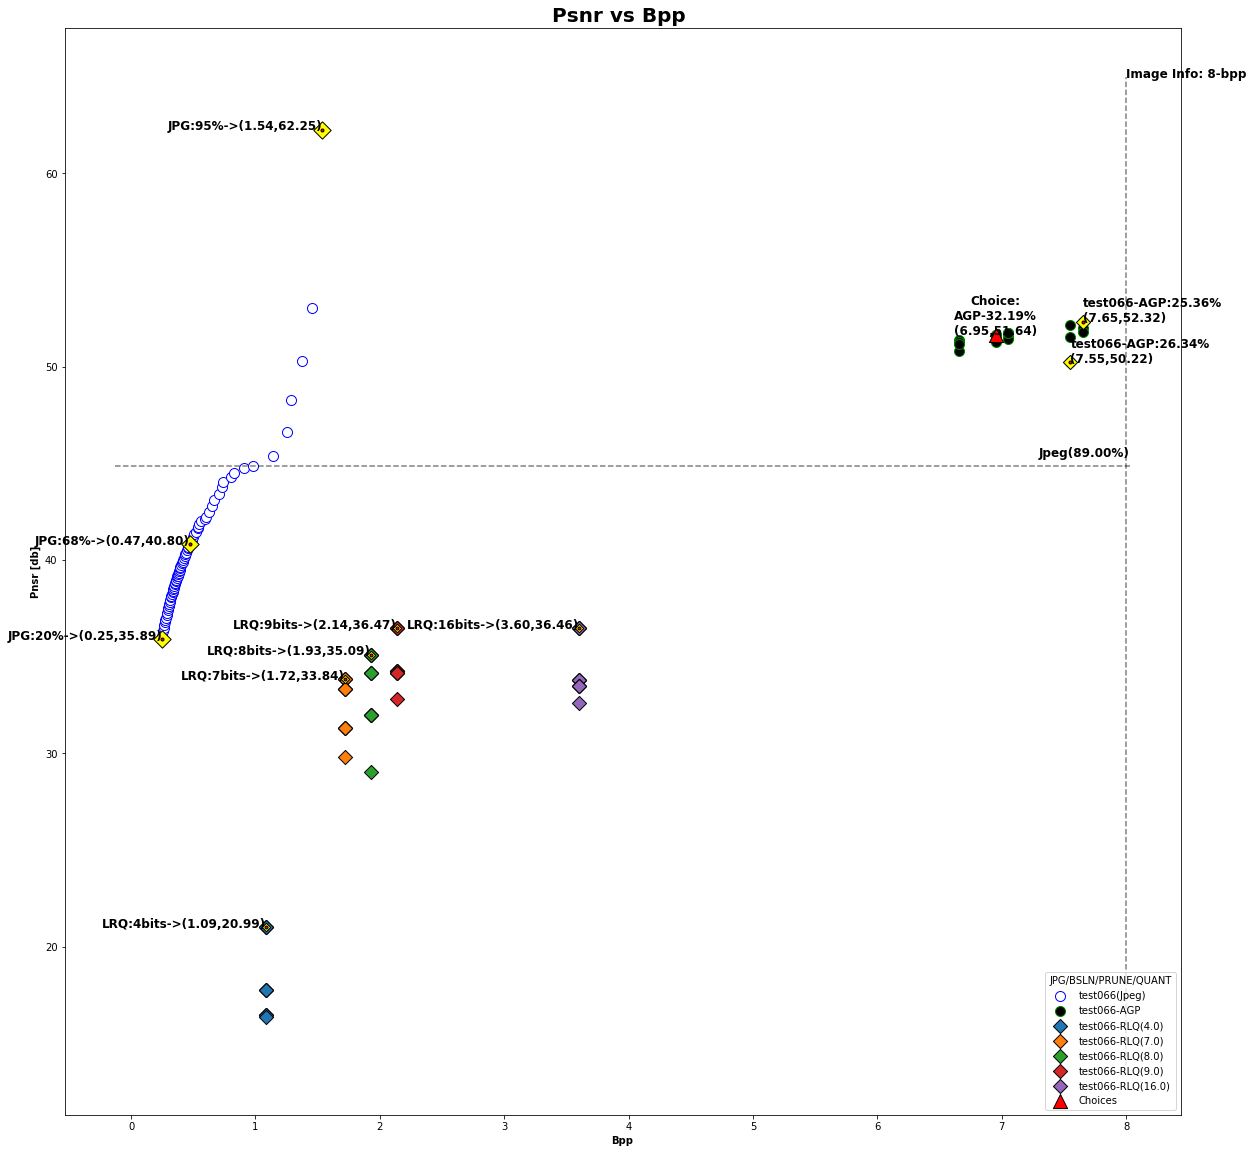

In [32]:
image_name = conf_data["input_data"]["image_name"]
show_data_from_datasets(
    jpeg_df=jpeg_df, prune_df=pruned_df, quant_df=quant_df,
    model_choices=model_choices,
    image_names=[image_name]
);

In [33]:
image_name = "cameramen"
jpeg_df = dataset_loaders.load_jpeg_dataset(dtype="dataframe", image_name=f"{image_name}")
pruned_df = dataset_loaders.load_prunining_dataset(dtype="dataframe", image_name=f"{image_name}")
quant_df = dataset_loaders.load_quant_dataset(dtype="dataframe")
baseline_df = dataset_loaders.load_siren_baselines_dataset(dtype="dataframe")

model_choices = pd.DataFrame()

In [34]:
pos = baseline_df["bpp"] <= 12.0
baseline_df = baseline_df[pos]

In [35]:
jpeg_df["image_name"] = [image_name] * jpeg_df.shape[0]
pruned_df["image_name"] = [image_name] * pruned_df.shape[0]

In [36]:
quant_df["quant_techs_2"] = [f"{image_name}-RLQ"] * quant_df.shape[0]
pruned_df["image_name_2"] = [f"{image_name}-AGP"] * pruned_df.shape[0]

In [37]:
def create_quality_attr(item):
    quality = float(item.split(":")[1])
    return quality
vals = jpeg_df["cmprss-class"].values
jpeg_df["quality"] = list(map(create_quality_attr, vals))

In [38]:
def create_prune_rate_attr(item):
    prune_rate = float(item.split(":")[1]) / 100
    return prune_rate
vals = pruned_df["cmprss-class"].values
pruned_df["prune_rate"] = list(map(create_prune_rate_attr, vals))

In [39]:
a_date = quant_df["init_from"].unique()[0]

In [40]:
pruned_df["date"].unique()

array(['2020.12.10-044629', '2020.12.09-085652', '2020.12.08-191157',
       '2020.12.07-045630', '2020.12.11-171610', '2020.12.12-190415',
       '2020.12.13-232457', '2020.12.14-174343', '2020.12.15-173411',
       '2020.12.14-102807'], dtype=object)

In [41]:
pos = pruned_df["date"] == a_date
a_pruned_row = pruned_df[pos].head(1)
a_pruned_row["prune_techs"] = ["AGP"] * a_pruned_row.shape[0]
a_pruned_row

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals,image_name,image_name_2,prune_rate,prune_techs
409,2020.12.13-232457,2020.11.29-231149,52036.0,61.962372,45.786802,6.352051,0.610155,0.000106,0.989081,AGP:38,AGP,AGP,35-40,cameramen,cameramen-AGP,0.38,AGP


In [42]:
baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 24 to 324
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  214 non-null    object 
 1   init-from             214 non-null    object 
 2   size(byte)            214 non-null    float64
 3   footprint(%)          214 non-null    float64
 4   psnr                  214 non-null    float64
 5   bpp                   214 non-null    float64
 6   CR                    214 non-null    float64
 7   mse                   214 non-null    float64
 8   ssim                  214 non-null    float64
 9   cmprss-class          214 non-null    object 
 10  cmprss-class-2        214 non-null    object 
 11  cmprss-class-3        214 non-null    object 
 12  prune_rate_intervals  214 non-null    object 
dtypes: float64(7), object(6)
memory usage: 23.4+ KB


In [43]:
a_date = a_pruned_row["init-from"].values[0]
pos = baseline_df["date"] == a_date
baseline_df[pos].head(5)

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals


In [44]:
def filter_required_data(item, n_hf=64, n_hl=5):
    return f"hf={str(n_hf)}" in item and f"hl={str(n_hl)}" in item
vals = baseline_df["cmprss-class"].values
pos = list(map(filter_required_data, vals))
a_baseline_row = baseline_df[pos].head(1)

a_baseline_row["prune_techs"] = ["BASELINE"] * a_baseline_row.shape[0]
a_baseline_row["prune_rate"] = ["-"] * a_baseline_row.shape[0]

a_baseline_row

,date,init-from,size(byte),footprint(%),psnr,bpp,CR,mse,ssim,cmprss-class,cmprss-class-2,cmprss-class-3,prune_rate_intervals,prune_techs,prune_rate
84,1603774067-025589,-,84228.0,100.0,49.973107,10.281738,0.376953,0.000041,0.99574,Baseline:hf=64:hl=5,SIREN,SIREN,SIREN,BASELINE,-


In [45]:
model_choices = pd.concat([a_baseline_row, a_pruned_row], axis = 0, ignore_index=True)

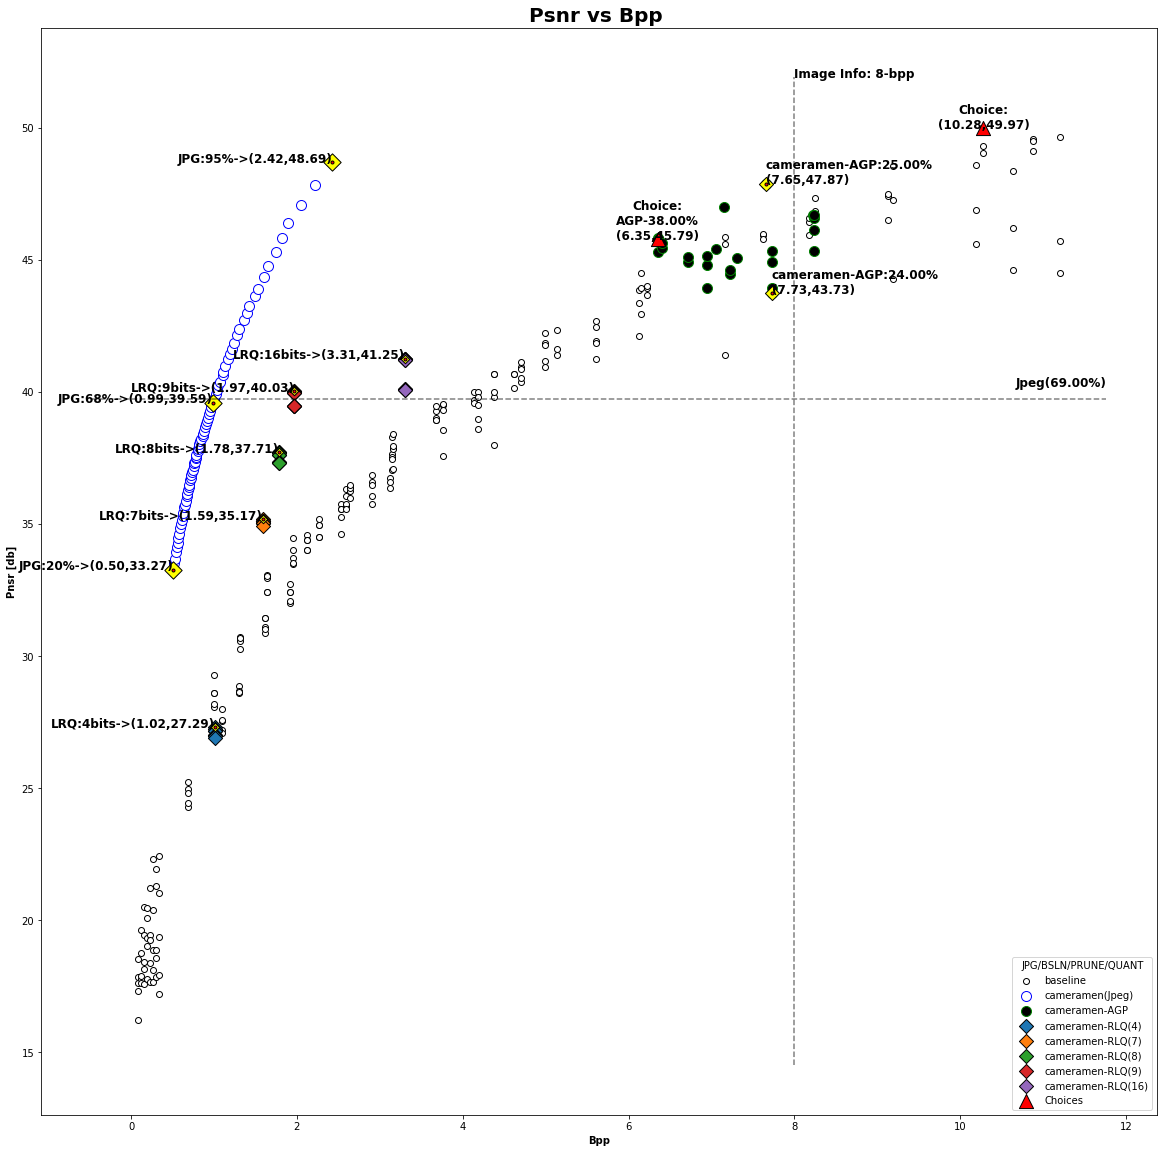

In [46]:
image_name = "cameramen"
show_data_from_datasets(
    jpeg_df=jpeg_df, prune_df=pruned_df, quant_df=quant_df,
    model_choices=model_choices, baseline_df=baseline_df,
    image_names=[image_name]
);